In [43]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

In [44]:
def function_generator(num_qubits):
    """Create a Deutsch-Jozsa oracle (constant or balanced) for num_qubits."""

    qc = QuantumCircuit(num_qubits + 1)

    if np.random.randint(0, 2): qc.x(num_qubits)  # 50% chance to flip output qubit
    if np.random.randint(0, 2): return qc         # 50% chance to return constant function
       
    hf_states = np.random.choice(range(2**num_qubits), 2**(num_qubits-1), replace=False) # flip half of them for balanced function

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in hf_states:
        qc.barrier()  
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

In [45]:
def gen_circuit(function: QuantumCircuit):
    """Prepares a circuit for use in the Deutsch-Jozsa algorithm."""

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [46]:
def dj_algorithm(function: QuantumCircuit):
    """Runs the Deutsch-Jozsa algorithm with the provided function circuit."""

    qc = gen_circuit(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

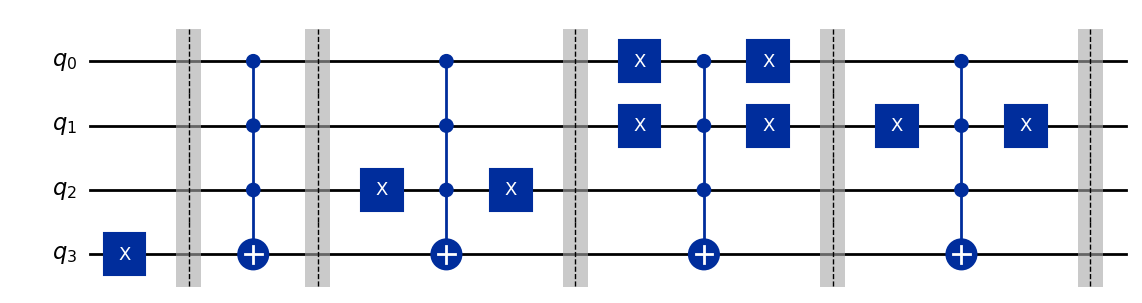

'balanced'

In [47]:
f = function_generator(3)
display(f.draw("mpl"))
display(dj_algorithm(f))